In [4]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [5]:
tdata = pd.read_csv("titanic.csv")

In [6]:
tdata.head()

,Is adult male,Age,Class/Dept,Fare,Joined,Job,Survived
0,False,29.0,1st Class,16300.0,Southampton,NaN,True
1,False,0.9,1st Class,11700.0,Southampton,NaN,True
2,False,2.0,1st Class,11700.0,Southampton,NaN,False
3,True,30.0,1st Class,11700.0,Southampton,Businessman,False
4,False,25.0,1st Class,11700.0,Southampton,NaN,False


In [11]:
tdata.shape

(2208, 7)

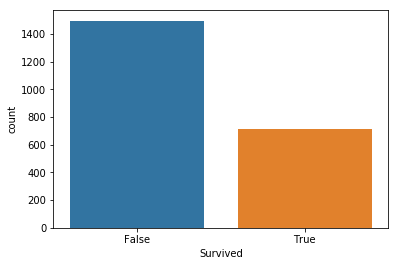

In [12]:
sns.countplot(x="Survived", data= tdata)

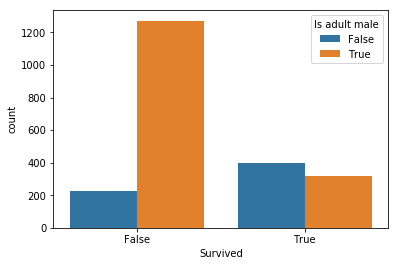

In [13]:
sns.countplot(x="Survived", hue= "Is adult male", data=tdata)

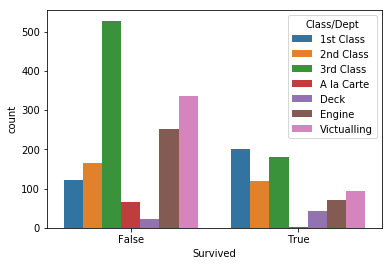

In [14]:
sns.countplot(x="Survived", hue="Class/Dept", data = tdata)

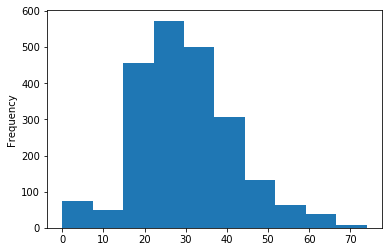

In [16]:
tdata["Age"].plot.hist();

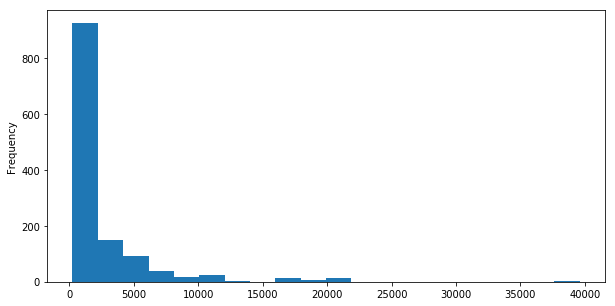

In [19]:
tdata["Fare"].plot.hist(bins=20, figsize=(10,5));

In [20]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 7 columns):
Is adult male    2208 non-null bool
Age              2199 non-null float64
Class/Dept       2208 non-null object
Fare             1291 non-null float64
Joined           2205 non-null object
Job              1560 non-null object
Survived         2208 non-null bool
dtypes: bool(2), float64(2), object(3)
memory usage: 90.6+ KB


In [22]:
tdata.isnull().sum()

Is adult male      0
Age                9
Class/Dept         0
Fare             917
Joined             3
Job              648
Survived           0
dtype: int64

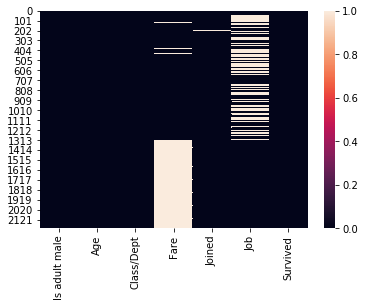

In [26]:
sns.heatmap(tdata.isnull());

In [34]:
tdata.head(4)

,Is adult male,Age,Class/Dept,Fare,Joined,Job,Survived
3,True,30.0,1st Class,11700.0,Southampton,Businessman,False
5,True,47.0,1st Class,2050.0,Southampton,Stockbroker,True
9,True,71.0,1st Class,3820.0,Cherbourg,Businessman,False
10,False,47.0,1st Class,19100.0,Cherbourg,Property Developer / Real Estate,False


In [43]:
tdata.drop("Fare", axis=1, inplace=True)

KeyError: "['Fare'] not found in axis"

In [42]:
tdata.drop("Job",axis=1, inplace=True)

In [44]:
tdata.head()

,Is adult male,Age,Class/Dept,Joined,Survived
3,True,30.0,1st Class,Southampton,False
5,True,47.0,1st Class,Southampton,True
9,True,71.0,1st Class,Cherbourg,False
10,False,47.0,1st Class,Cherbourg,False
12,False,24.0,1st Class,Cherbourg,True


In [45]:
tdata.shape

(639, 5)

In [46]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 3 to 1316
Data columns (total 5 columns):
Is adult male    639 non-null bool
Age              639 non-null float64
Class/Dept       639 non-null object
Joined           639 non-null object
Survived         639 non-null bool
dtypes: bool(2), float64(1), object(2)
memory usage: 21.2+ KB


In [47]:
tdata.isnull().sum()

Is adult male    0
Age              0
Class/Dept       0
Joined           0
Survived         0
dtype: int64

In [48]:
tdata.head(5)

,Is adult male,Age,Class/Dept,Joined,Survived
3,True,30.0,1st Class,Southampton,False
5,True,47.0,1st Class,Southampton,True
9,True,71.0,1st Class,Cherbourg,False
10,False,47.0,1st Class,Cherbourg,False
12,False,24.0,1st Class,Cherbourg,True


# Before using logistic regression , we need to treat categorical/string input variables

In [92]:
tdata = pd.get_dummies(tdata)

In [93]:
gender = pd.get_dummies(tdata['Is adult male'])

In [94]:
gender.head()

,False,True
,,
3,0,1
5,0,1
9,0,1
10,1,0
12,1,0


# one column is able to represent gender data so dropping the first column

In [95]:
gender = pd.get_dummies(tdata['Is adult male'], drop_first=True)

In [96]:
gender.head()

,True
,
3,1
5,1
9,1
10,0
12,0


In [97]:
gender.columns = ['gender']

In [98]:
gender.head()

,gender
,
3,1
5,1
9,1
10,0
12,0


In [99]:
Survived_pass = pd.get_dummies(tdata['Survived'])

In [100]:
Survived_pass.head()

,False,True
,,
3,1,0
5,0,1
9,1,0
10,1,0
12,0,1


In [101]:
Survived_pass = pd.get_dummies(tdata['Survived'], drop_first=True)

In [102]:
Survived_pass.head()

,True
,
3,0
5,1
9,0
10,0
12,1


In [103]:
type(Survived_pass)

pandas.core.frame.DataFrame

In [104]:
Survived_pass.columns = ['Sur_Pass']

In [105]:
Survived_pass.head()

,Sur_Pass
,
3,0
5,1
9,0
10,0
12,1


In [119]:
tdata1 = pd.concat([tdata,gender,Survived_pass], axis=1)

In [120]:
tdata1.head(5)

,Is adult male,Age,Survived,Class/Dept_1st Class,Class/Dept_2nd Class,Class/Dept_3rd Class,Joined_Belfast,Joined_Cherbourg,Joined_Queenstown,Joined_Southampton,gender,Sur_Pass
,,,,,,,,,,,,
3,True,30.0,False,1,0,0,0,0,0,1,1,0
5,True,47.0,True,1,0,0,0,0,0,1,1,1
9,True,71.0,False,1,0,0,0,1,0,0,1,0
10,False,47.0,False,1,0,0,0,1,0,0,0,0
12,False,24.0,True,1,0,0,0,1,0,0,0,1


Now we will remove unwanted columns. 'Is adult male' column is explained by 'gender' so as 'Survived' by 'Sur_Pass'. Also first columns from class and joined not needed.

In [121]:
tdata2 = tdata1.drop(['Is adult male','Survived','Class/Dept_1st Class','Joined_Belfast'],axis=1, inplace=False)

In [122]:
tdata2 = pd.DataFrame(tdata2)

In [123]:
tdata2.head(5)

,Age,Class/Dept_2nd Class,Class/Dept_3rd Class,Joined_Cherbourg,Joined_Queenstown,Joined_Southampton,gender,Sur_Pass
,,,,,,,,
3,30.0,0,0,0,0,1,1,0
5,47.0,0,0,0,0,1,1,1
9,71.0,0,0,1,0,0,1,0
10,47.0,0,0,1,0,0,0,0
12,24.0,0,0,1,0,0,0,1


# Preparing Train & Test data

In [125]:
X = tdata2.drop('Sur_Pass',axis=1)
y = tdata2['Sur_Pass']

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=27)

# Import LogisticRegression and Fit Model on X_train & y_train

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
logmodel = LogisticRegression()

In [131]:
logmodel.fit(X_train,y_train)

C:\Users\Nishant\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Make Predictions on X_test using model.predict

In [132]:
predictions = logmodel.predict(X_test)

# Import Accuracy Score for y_test over predictions

In [133]:
from sklearn.metrics import accuracy_score

In [134]:
accuracy_score(y_test, predictions)

0.8578199052132701